In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow tabulate

In [1]:
import numpy as np
import pandas as pd
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, hamming_loss
from tabulate import tabulate
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [2]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [3]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [4]:
dirpath = 'SMAI-PCAdataset/IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


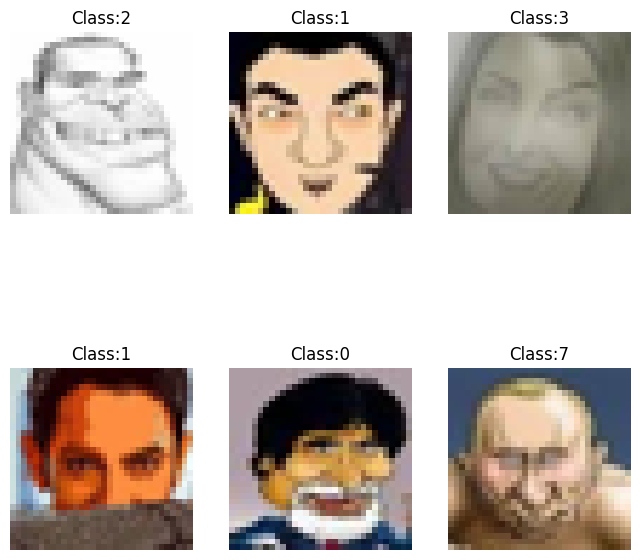

In [5]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

### 1.1.1

In [6]:
# converting the data to 2D matrix
X= X.reshape(672, -1)
X.shape

(672, 3072)

In [7]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean
        # to find the covariance, functions needs the samples as columns
        cov = np.cov(X.T)
#         print(cov)
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # eigenvectors v = [:, i] are in column vector form, transposing it for consistency
        eigenvectors = eigenvectors.T

        # sort eigenvectors in descending order 
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        # display(eigenvalues)

        eigenvectors = eigenvectors[indices]
        # taking the first n_components in transformed vector space
        self.eigenvectors = eigenvectors
        self.components = eigenvectors[:self.n_components]
        
#         print(np.cov(eigenvectors.T))

    def transform(self, X):
        # projects data
        X = X - self.mean
        # taking dot product of the x with the k components of the transformed vector space
        return np.dot(X, self.components.T)
    
    def get_loadings(self):
        return (self.eigenvectors.T)[:self.n_components]
    

In [8]:
pca = PCA(n_components = 3)
pca.fit(X)
X_projected = pca.transform(X)
    
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]

Shape of X: (672, 3072)
Shape of transformed X: (672, 3)


C:\Users\hp\AppData\Local\Temp\ipykernel_18968\764876085.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, np.zeros_like(x1), c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("cool", 8))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


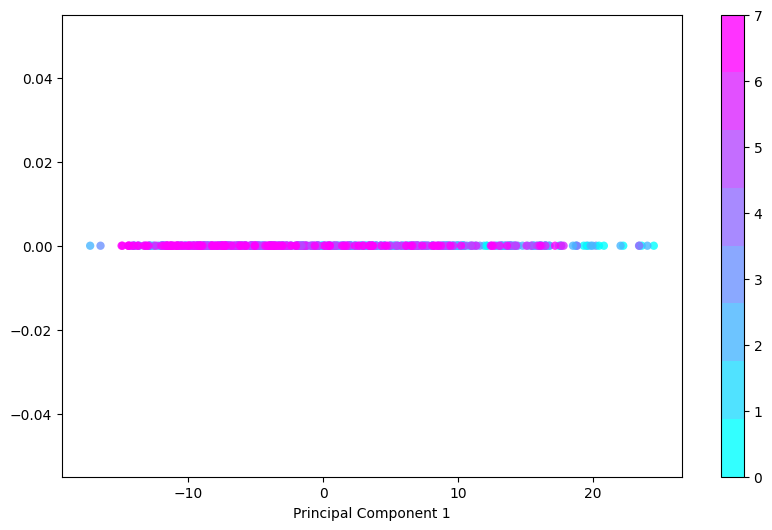

In [9]:
plt.figure(figsize = (10, 6))
plt.scatter(x1, np.zeros_like(x1), c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("cool", 8))
plt.xlabel("Principal Component 1")
plt.colorbar()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18968\3323907754.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("cool", 8))


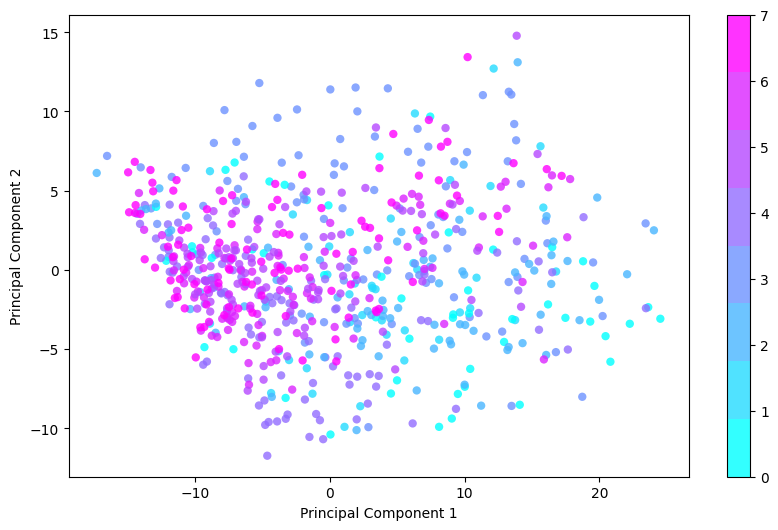

In [10]:
plt.figure(figsize = (10, 6))
plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("cool", 8))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18968\4151828426.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter3D(x1, x2, x3, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("cool", 8))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Principal Component 3')

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


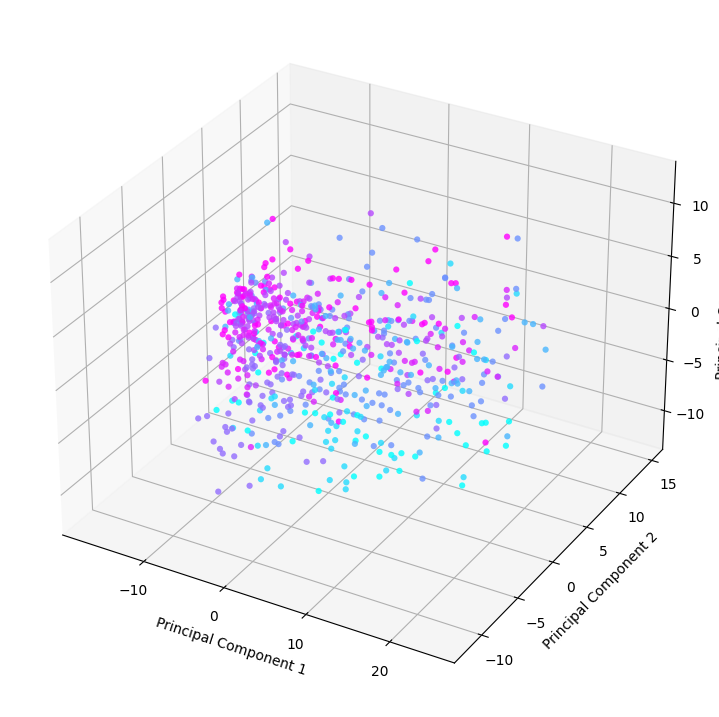

In [11]:
plt.figure(figsize = (9, 15))
ax = plt.axes(projection ="3d")
ax.scatter3D(x1, x2, x3, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("cool", 8))
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

### 1.1.2

In [12]:
mean = np.mean(X, axis=0)
X = X -  mean
# to compute the covariance we need to pass the samples as column vectors
cov = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# eigenvectors v = [:, i] are in column vector form, transposing this for consistency
eigenvectors = eigenvectors.T

#sort eigenvectors in descending order
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

eigenvalues_sum = np.sum(eigenvalues)

# computing the cumulative explained variance as the no of principal components increases
cvariances = []
cvariance = 0
for k in eigenvalues:
    cvariance += k/eigenvalues_sum
    cvariances.append(cvariance)

In [13]:
# cvariances

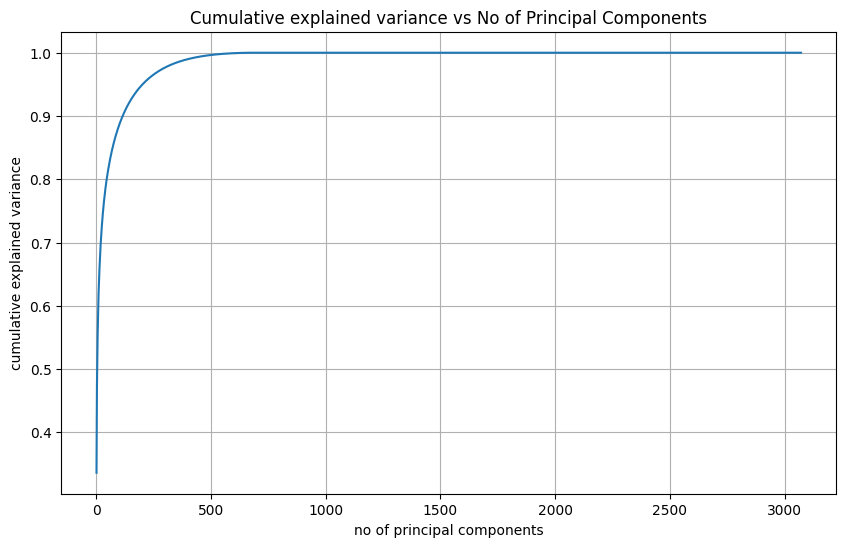

In [14]:
k = [x for x in range(1, 3073)]

# Plotting the relationship between the cumulative explained variance and no of principal components
plt.figure(figsize= (10,6))
plt.plot(k, cvariances)
plt.xlabel("no of principal components")
plt.ylabel("cumulative explained variance")
plt.title("Cumulative explained variance vs No of Principal Components")
plt.grid(True)
plt.show()

### 1.1.3

In [15]:
#loading the pictionary data
data_pictionary = np.load("data.npy", allow_pickle = True)

In [16]:
#extracting the input x and output y
X_raw_pic = data_pictionary[:, 2]
y_pic = data_pictionary[:, 3]

In [17]:
X_raw_pic = X_raw_pic.reshape(1500, -1)
X_data = []
for x in X_raw_pic:
    X_data.append(x[0][0])
X_pic = np.asarray(X_data)
X_pic.shape

(1500, 512)

In [18]:
mean = np.mean(X_pic, axis=0)
X_pic = X_pic -  mean
# to compute the covariance we need to pass the samples as column vectors
cov = np.cov(X_pic.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# eigenvectors v = [:, i] are in column vector form, transposing this for consistency
eigenvectors = eigenvectors.T

#sort eigenvectors in descending order
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]
eigenvalues_sum = np.sum(eigenvalues)

# computing the cumulative explained variance as the no of principal components increases
cvariances = []
cvariance = 0;
for k in eigenvalues:
    # cumulative explained variance is the sum of the eigenvalues of the principal components divided by the sum of all eigenvalues
    cvariance += k/eigenvalues_sum
    cvariances.append(cvariance)

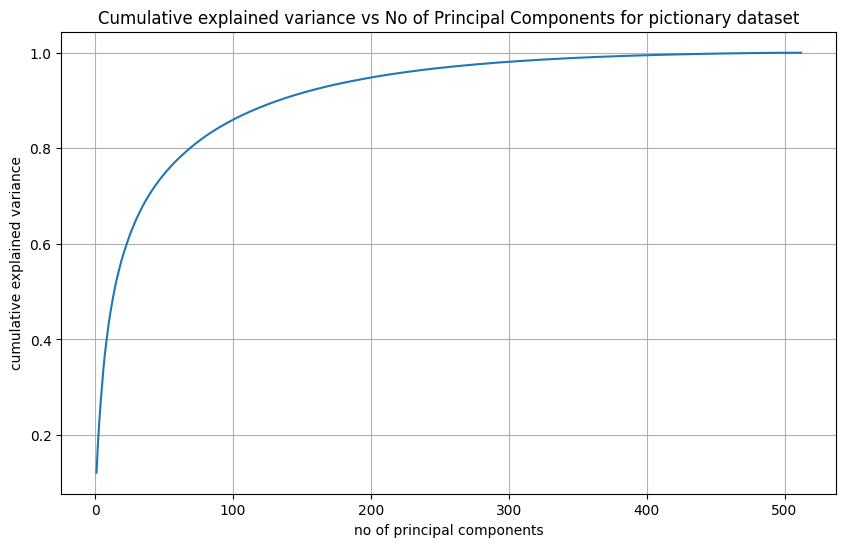

In [19]:
k = [x for x in range(1, 513)]

# Plotting the relationship between the cumulative explained variance and no of principal components
plt.figure(figsize= (10,6))
plt.plot(k, cvariances)
plt.xlabel("no of principal components")
plt.ylabel("cumulative explained variance")
plt.title("Cumulative explained variance vs No of Principal Components for pictionary dataset")
plt.grid(True)
plt.show()

We can see that if we consider top 100 principal components of the dataset, we get the cumulative explained variance close to 1. This transformed input X should be able to train a kNN model which performs close enough to the original one. Therefore, reducing the dimension of dataset to 100 will result in similar performance to the original dataset. When the dimensions are less than 100 the cumulative explained variance is low, which means the data is underfit and gives low accuracy.

In [20]:
pca = PCA(100)
pca.fit(X_pic)
X_pic_transformed = pca.transform(X_pic)

print(X_pic_transformed.shape)

(1500, 100)


In [21]:
## class for kNN classifier
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
        
    def calculate_distance(self, x1, x2):
#         print(x2.shape)
        return np.sqrt(np.sum((x1-x2)**2))
        
    def _predict(self, x):
        distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
        indices = np.argsort(distances)
        k_nearest_indices = indices[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_nearest_indices]
        most_common = Counter(k_nearest_labels).most_common()
        
        
        if len(most_common)>1:
            weighted_votes = {}
            for i, label in zip(k_nearest_indices, k_nearest_labels):
                if label in weighted_votes:
                    weighted_votes[label] += 1.0 / (1.0 + distances[i])  # Weighted vote based on distance
                else:
                    weighted_votes[label] = 1.0 / (1.0 + distances[i])

            # Finding the label with the highest weighted vote
            predicted_label = max(weighted_votes, key=weighted_votes.get)

            return predicted_label
        return most_common[0][0]
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def validate(self, X, Y_actual):
        Y_predictions = self.predict(X)
        f1_weighted = f1_score(Y_actual, Y_predictions, average='weighted', zero_division=1)
        f1_micro = f1_score(Y_actual, Y_predictions, average='micro', zero_division=1)
        f1_macro = f1_score(Y_actual, Y_predictions, average='macro', zero_division=1)
        accuracy = accuracy_score(Y_actual, Y_predictions)
        precision = precision_score(Y_actual, Y_predictions, average='weighted', zero_division=1)
        recall = recall_score(Y_actual, Y_predictions, average='weighted', zero_division=1)
        return recall, precision, accuracy, f1_weighted, f1_micro, f1_macro


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pic, y_pic, test_size=0.15, random_state=42)
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_pic_transformed, y_pic, test_size=0.15, random_state= 42)

In [23]:
kNN = KNN(5)
kNN.fit(X_train, y_train)
recall, precision, accuracy, f1_weighted, f1_micro, f1_macro = kNN.validate(X_test, y_test)

print("metrics for original data")
metrics = [[recall, precision, accuracy, f1_weighted, f1_micro, f1_macro]]
headers = ["recall", "precision", "accuracy", "f1 weighted", "f1 micro", "f1 macro"]
table = tabulate(metrics, headers, tablefmt="grid")
print(table)

metrics for original data
+----------+-------------+------------+---------------+------------+------------+
|   recall |   precision |   accuracy |   f1 weighted |   f1 micro |   f1 macro |
+==========+=============+============+===============+============+============+
| 0.266667 |    0.562967 |   0.266667 |      0.468363 |   0.266667 |   0.352881 |
+----------+-------------+------------+---------------+------------+------------+


In [24]:
kNN = KNN(5)
kNN.fit(X_train_transformed, y_train)
recall, precision, accuracy, f1_weighted, f1_micro, f1_macro = kNN.validate(X_test_transformed, y_test)

print("metrics for dimensionally reduced data")
metrics = [[recall, precision, accuracy, f1_weighted, f1_micro, f1_macro]]
headers = ["recall", "precision", "accuracy", "f1 weighted", "f1 micro", "f1 macro"]
table = tabulate(metrics, headers, tablefmt="grid")
print(table)

metrics for dimensionally reduced data
+----------+-------------+------------+---------------+------------+------------+
|   recall |   precision |   accuracy |   f1 weighted |   f1 micro |   f1 macro |
+==========+=============+============+===============+============+============+
| 0.257778 |    0.539873 |   0.257778 |      0.498985 |   0.257778 |   0.366554 |
+----------+-------------+------------+---------------+------------+------------+


We can observe that the dimensionally reduced dataset gives us the same accuracy as that of the original dataset on KNN model.

In [25]:
# we calculate the accuracy of the kNN classifier for different dimension of the dataset and plot it
accuracies = []

mean = np.mean(X_pic, axis=0)
X_pic = X_pic -  mean
# to compute the covariance we need to pass the samples as column vectors
cov = np.cov(X_pic.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# eigenvectors v = [:, i] are in column vector form, transposing this for consistency
eigenvectors = eigenvectors.T

#sort eigenvectors in descending order
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

for i in range(1, 513, 5):
    i_components = eigenvectors[:i]
#     X_data_normalised = X_data - mean;
    X_pic_transformed = np.dot(X_pic, i_components.T)
    X_pic_transformed = np.real(X_pic_transformed)
    X_train, X_test, y_train, y_test = train_test_split(X_pic_transformed, y_pic, test_size=0.2, random_state=42)
    
    kNN = KNN(k=5)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
#     print(accuracy)

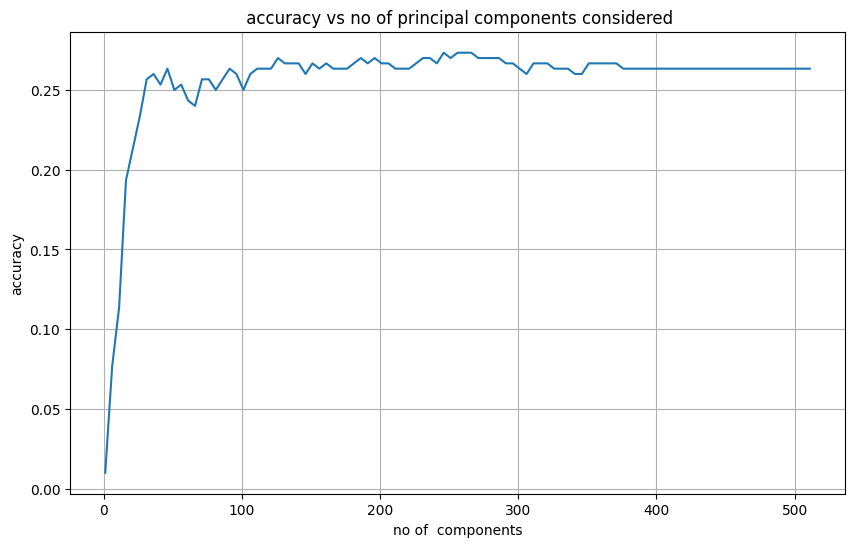

In [26]:
k = [x for x in range(1, 513, 5)]

plt.figure(figsize=(10,6))
plt.plot(k, accuracies)
plt.xlabel('no of  components')
plt.ylabel('accuracy')
plt.title(' accuracy vs no of principal components considered')
plt.grid(True)
plt.show()

We can observe that the accuracy initially increase with increase in the dimension of the dataset. After 100 no of dimension of dataset the accuracy kinda stabilizes to the maximum value. The jagged nature of the plot after 100 dimensions is because of overfitting. Sometimes taking too many dimension can cause the model to overfit which can slightly decrease the performance of the model. Also when the dimensions of the dataset is less than 100 the data remains underfit giving us low accuracy

### 1.1.4

In [27]:
# Classification
X_data = X

In [28]:
# reducing the dimension of the dataset to 500
pca = PCA(500)
pca.fit(X_data)
X_transformed = pca.transform(X_data)
X_transformed = np.real(X_transformed)
X_transformed.shape

(672, 500)

In [29]:
X_data.shape

(672, 3072)

In [30]:
# splitting the transformed dataset into train and test
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [31]:
# fitting the kNN classifier on the transformed dataset
classifier = KNeighborsClassifier(n_neighbors=25).fit(X_train_transformed, y_train)
y_pred = classifier.predict(X_test_transformed)
# print(y_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=1)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("metrics for classification on dimensionally reduced dataset")
metrics = [[accuracy, recall, precision, f1_micro, f1_macro]]
headers = ["accuracy", "recall", "precision", "f1_score(micro)", "f1_score(macro)"]
table = tabulate(metrics, headers, tablefmt = 'grid')
print(table)

metrics for classification on dimensionally reduced dataset
+------------+----------+-------------+-------------------+-------------------+
|   accuracy |   recall |   precision |   f1_score(micro) |   f1_score(macro) |
+============+==========+=============+===================+===================+
|        0.4 |      0.4 |    0.507686 |               0.4 |          0.527364 |
+------------+----------+-------------+-------------------+-------------------+


In [32]:
# splitting the original dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [33]:
# fitting the kNN classifier on the original dataset
classifier = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=1)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("metrics for classification on original dataset")
metrics = [[accuracy, recall, precision, f1_micro, f1_macro]]
headers = ["accuracy", "recall", "precision", "f1_score(micro)", "f1_score(macro)"]
table = tabulate(metrics, headers, tablefmt = 'grid')
print(table)

metrics for classification on original dataset
+------------+----------+-------------+-------------------+-------------------+
|   accuracy |   recall |   precision |   f1_score(micro) |   f1_score(macro) |
+============+==========+=============+===================+===================+
|        0.4 |      0.4 |    0.507686 |               0.4 |          0.527364 |
+------------+----------+-------------+-------------------+-------------------+


In [34]:
# we calculate the accuracy of the kNN classifier for different dimension of the dataset and plot it
accuracies = []

mean = np.mean(X_data, axis=0)
X_data = X_data -  mean
# to compute the covariance we need to pass the samples as column vectors
cov = np.cov(X_data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# eigenvectors v = [:, i] are in column vector form, transposing this for consistency
eigenvectors = eigenvectors.T

#sort eigenvectors in descending order
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

for i in range(1, 3073, 20):
    i_components = eigenvectors[:i]
#     X_data_normalised = X_data - mean;
    X_transformed = np.dot(X_data, i_components.T)
    X_transformed = np.real(X_transformed)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    
    classifier = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
#     print(accuracy)


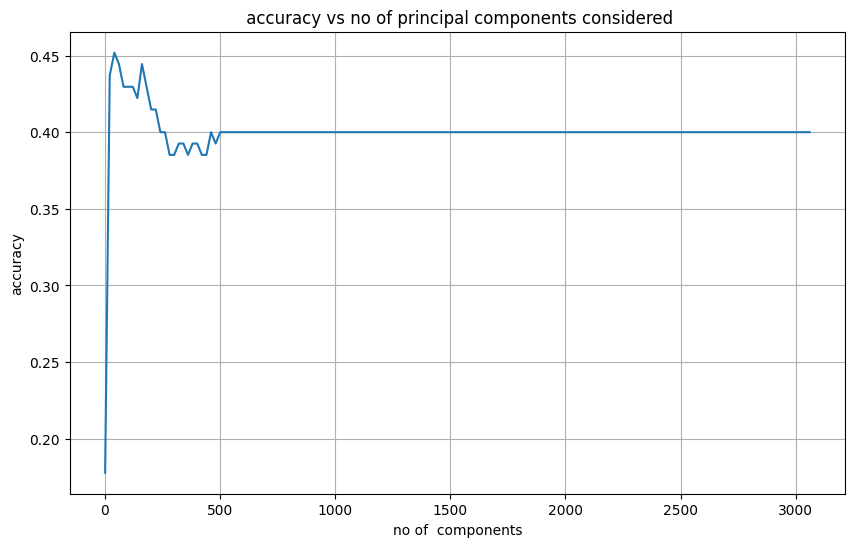

In [35]:
k = [x for x in range(1, 3073, 20)]

plt.figure(figsize=(10,6))
plt.plot(k, accuracies)
plt.xlabel('no of  components')
plt.ylabel('accuracy')
plt.title(' accuracy vs no of principal components considered')
plt.grid(True)
plt.show()

From the above plot we can observe that the accuracy first increases as we increase the dimensions of dataset. After a certain value of accuracy, it starts decreasing a bit with increase in the dimensions and then stabilises to a constant value. We know that the initial increase in accuracy is due to the fact the as we take more dimensions we are increasing the cumulative explained variance of the dataset (less dimensions of the dataset causes underfiting of the model). Now the decrease after that point is due to the fact the sometimes high dimensional data can cause overfitting in the model we can reduce its performance on the test dataset. After a certain point it stabilises to a constant value because increase in dimension now doesn't cause much increase in the cumulative explained variance of the dataset.

### 1.2

In [36]:
# pictionary

drawer_data = pd.read_csv('smai_assignment_pictionary/drawer_attributes.csv')
drawer_data.head()
drawer_data = drawer_data.drop(['d_drawer'], axis=1)
drawer_data.head()

,d_area_median,d_stroke_freq_median,d_rangestroketime_median,d_firststroketime_median,d_laststroketime_median,d_pcgamestup,d_pcgamestdown,d_pcgameserasehighlight
0,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000000
1,82306.749763,0.578802,21.660,3.512,26.815,0.00,0.0,0.777778
2,60929.328432,0.239168,25.087,1.368,26.455,1.00,1.0,1.000000
3,119037.637976,0.402533,54.162,2.459,56.621,0.75,0.5,1.000000
4,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000000


In [37]:
feature_names = list(drawer_data.columns)
feature_names

['d_area_median',
 'd_stroke_freq_median',
 'd_rangestroketime_median',
 'd_firststroketime_median',
 'd_laststroketime_median',
 'd_pcgamestup',
 'd_pcgamestdown',
 'd_pcgameserasehighlight']

In [38]:
drawer_data.shape
scaler = StandardScaler()
drawer_data_scaled = scaler.fit_transform(drawer_data)

In [39]:
pca = PCA(2)
pca.fit(drawer_data_scaled)
data_transformed = pca.transform(drawer_data_scaled)
data_components = pca.get_loadings()
# print(data_components)
data = [component.tolist() for component in data_components]
headers = [feature_name for feature_name in feature_names]
table = tabulate(data, headers, tablefmt="pretty")
print(table)

+---------------------+----------------------+--------------------------+--------------------------+-------------------------+---------------------+---------------------+-------------------------+
|    d_area_median    | d_stroke_freq_median | d_rangestroketime_median | d_firststroketime_median | d_laststroketime_median |    d_pcgamestup     |   d_pcgamestdown    | d_pcgameserasehighlight |
+---------------------+----------------------+--------------------------+--------------------------+-------------------------+---------------------+---------------------+-------------------------+
| 0.32742125354985685 |  0.2791301785677945  |   -0.25468388295424543   |    0.6426072861878251    |  -0.016614055420051375  | -0.519119114913218  | -0.2587696943090975 |  -0.01874098822393994   |
| 0.1875766139490524  | 0.09646145486543384  |    -0.756771712640231    |   -0.0706110128162962    |   0.4682461514560751    | 0.37884879907107766 | 0.11850519234043569 |   0.03156754533716605   |
+--------------

C:\Users\hp\AppData\Local\Temp\ipykernel_18968\3431495287.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1i, x2i, c=[color], cmap='viridis', label=feature_name)


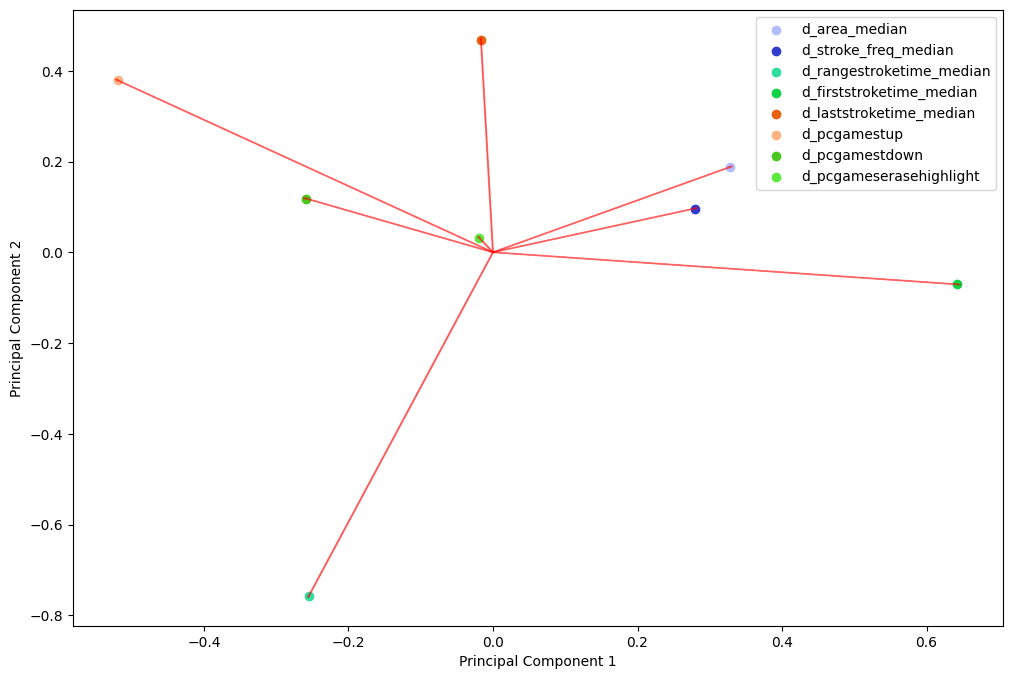

In [40]:
x1 = data_components[0]
x2 = data_components[1]
colors = np.random.rand(len(x1), 3)

plt.figure(figsize = (12, 8))
for i, (x1i, x2i, feature_name, color) in enumerate(zip(x1, x2, feature_names, colors)):
    plt.scatter(x1i, x2i, c=[color], cmap='viridis', label=feature_name)
    plt.arrow(0, 0, x1i, x2i, color='r', alpha=0.5)
plt.legend()

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

from the above plot of features vs principal components, we get the weightage (contribution) of the each feature in each principal component. For example principal component one the feature d_firststroketime_median and d_pcgamestup has more magnitude compared to other feature, this means that these features mainly decide the variance of the dataset along principal component 1. Similarly for principal component 2, the feature d_rangestroketime_median and d_laststroketime_median has more magnitude which means that these feature mainly decide the variance along the princpal component 2.

In [41]:
guesser_data = pd.read_csv('smai_assignment_pictionary/guesser_attributes.csv')
guesser_data
guesser_data = guesser_data.drop('g_guesser', axis=1)
guesser_data.head()

,g_noofmessage_median,g_firstmessagetime_median,g_lastmessagetime_median,g_rangemessagetime_median,g_pcgamesconfusion,g_entropy
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,1.0,25.367172,39.041594,0.000000,0.0,0.000000
2,2.0,12.988740,51.351317,38.362577,1.0,0.693147
3,3.5,20.622346,64.718058,44.095712,0.0,1.242453
4,3.0,30.339558,78.943003,48.603445,0.0,1.098612


In [42]:
feature_names = list(guesser_data.columns)
feature_names

['g_noofmessage_median',
 'g_firstmessagetime_median',
 'g_lastmessagetime_median',
 'g_rangemessagetime_median',
 'g_pcgamesconfusion',
 'g_entropy']

In [43]:
guesser_data.shape
scaler = StandardScaler()
guesser_data_scaled = scaler.fit_transform(guesser_data)

In [44]:
pca = PCA(2)
pca.fit(guesser_data_scaled)
data_transformed = pca.transform(guesser_data_scaled)
data_components = pca.get_loadings()

# print(data_components)
data = [component.tolist() for component in data_components]
headers = [feature_name for feature_name in feature_names]
table = tabulate(data, headers, tablefmt="pretty")
print(table)

+----------------------+---------------------------+--------------------------+---------------------------+---------------------+----------------------+
| g_noofmessage_median | g_firstmessagetime_median | g_lastmessagetime_median | g_rangemessagetime_median | g_pcgamesconfusion  |      g_entropy       |
+----------------------+---------------------------+--------------------------+---------------------------+---------------------+----------------------+
|  0.5030033315708899  |    0.11902293267507483    |   -0.1587893367800747    |    0.4413278822123762     | 0.29864871667374066 | -0.6508807731543605  |
| 0.17286102427291178  |    -0.8302386209593532    |   0.20721895042131253    |    0.27916178929118746    | -0.3952803740040185 | -0.06087139285499955 |
+----------------------+---------------------------+--------------------------+---------------------------+---------------------+----------------------+


C:\Users\hp\AppData\Local\Temp\ipykernel_18968\1203475116.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1i, x2i, c=[color], cmap='viridis', label=feature_name)


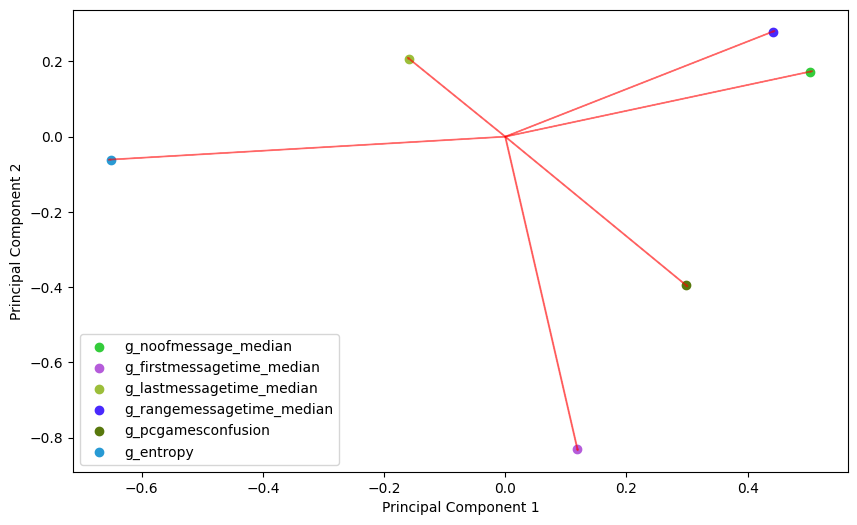

In [45]:
x1 = data_components[0]
x2 = data_components[1]
colors = np.random.rand(len(x1), 3)

plt.figure(figsize = (10, 6))
for i, (x1i, x2i, feature_name, color) in enumerate(zip(x1, x2, feature_names, colors)):
    plt.scatter(x1i, x2i, c=[color], cmap='viridis', label=feature_name)
    plt.arrow(0, 0, x1i, x2i, color='r', alpha=0.5)
plt.legend()

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

from the above plot of features vs principal components, we get the weightage (contribution) of the each feature in each principal component. For example principal component one the feature g_entropy has more magnitude compared to other feature, this means that these features mainly decide the variance of the dataset along principal component 1. Similarly for principal component 2, the feature g_firstmessagetime_median has more magnitude which means that these feature mainly decide the variance along the principal component 2